# Продвинутое машинное обучение: ДЗ 1
Первое ДЗ состоит из двух частей: первая часть про теорему Байеса и общие вероятностные рассуждения, вторая часть — про линейную регрессию. В качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для пользователя snikolenko). Решение обязательно нужно сдать на портале Академии.

## Часть I: О теореме Байеса
Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.


### 1. 
Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

#### Ответ:

A - виновен 

B - кровь редкой группы 

P(B) = 0.01 

P(A|B) - вероятность виновности при совпадении группы крови

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

Прокурор указал вероятность того, что у подсудимого другая группа крови, (0.99) 

Нужно было оценить вероятность виновности при совпадении группы крови

----------

### 2. 
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

#### Ответ:

Адвокат умалчивает о том, что подсудимый не был равномерно и случайно выбран из этих 10 тыс. человек. 

Как будто бы следователи взяли, да выбрали подозреваемым случайного человека с редкой группой крови. Но, кажется, так обычно не делают.

Т.е. он оценил вероятность того, что подсудимый виновен, если все участники следствия и суда жили в вакууме и ничего не знали, а надо было как и в прошлый раз искать вероятность виновности при совпадении крови подозреваемого и преступника.

----------

### 3. 
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

#### Ответ:

Вероятность того, что пациент болен при положительном результате теста:

$ P(d=1|t=1)=\frac{P(t=1|d=1)P(d=1)}{P(t=1)} = \frac{P(t=1|d=1)P(d=1)}{P(t=1|d=1)*P(d=1) + P(t=1|d=0)*P(d=0)} = 
\frac{.95 * .01}{.95*.01 + .05*.99} \approx .16 $

Вероятность того, что пациент болен при отрицательном результате теста:

$ P(d=1|t=0)=\frac{P(t=0|d=1)P(d=1)}{P(t=0)} = \frac{P(t=0|d=1)P(d=1)}{P(t=0|d=1)*P(d=1) + P(t=0|d=0)*P(d=0)} = 
\frac{.05 * .01}{.05*.01 + .95*.99} \approx .00053 $

-------

$ P(\text{False positives}) = P(t=1|d=0) = 1 - P(t=0|d=0) = .05 $

$ P(\text{False negatives}) = P(t=0|d=1) = 1 - P(t=1|d=1) = .05 $

Подставим обозначения выше в формулы и грубо упростим их, чтобы увидеть примерную связь между вероятностями ошибок и апостериором:

$ P(d=1|t=1) = \frac{(1 - P(\text{False negatives}))*P(d=1)}{(1 - P(\text{False negatives}))*P(d=1) + P(\text{False positives})*P(d=0)} \sim \frac{k}{\text{P(False positives)}} $


$ P(d=1|t=0) = \frac{P(\text{False negatives})*P(d=1)}{P(\text{False negatives})*P(d=1) + (1 - P(\text{False positives}))*P(d=0)} \sim k * P(\text{False negatives}) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def disease_posterior_prob(p_false_pos=.05, p_false_neg=.05, t=1):
    """Calculate posterior probability that patient are diseased using 
    outcome of some test
    
    Parameters
    ----------
    p_false_pos : float, probability of False positives \t
    p_false_neg : float, probability of False negatives \t
    t : int, {0, 1}, the test output  \t
    """
    prior = .01
    neg_prior = 1 - prior

    if t == 1:
        likelihood = 1 - p_false_neg
        marginalization = likelihood * prior + p_false_pos * neg_prior
    elif t == 0:
        likelihood = p_false_neg
        marginalization = likelihood * prior + (1 - p_false_pos) * neg_prior
    else:
        raise Exception("42")

    posterior = likelihood * prior / marginalization
    return posterior

Проверим работоспособность функции на базовых вероятностях ошибок

In [2]:
f"{disease_posterior_prob(t=1):.3f}, {disease_posterior_prob(t=0):.5f}"

'0.161, 0.00053'

Нарисуем 

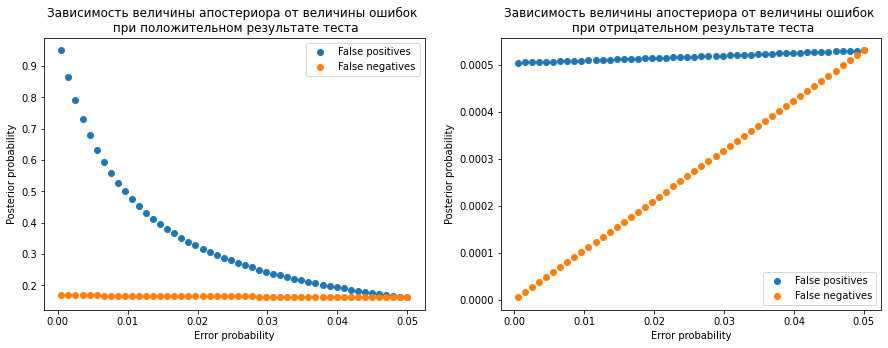

In [3]:
X = np.linspace(.05, .0005, 50)
y_for_diff_FP_t1 = list(map(lambda x: disease_posterior_prob(x, .05, t=1), X))
y_for_diff_FN_t1 = list(map(lambda x: disease_posterior_prob(.05, x, t=1), X))

y_for_diff_FP_t0 = list(map(lambda x: disease_posterior_prob(x, .05, t=0), X))
y_for_diff_FN_t0 = list(map(lambda x: disease_posterior_prob(.05, x, t=0), X))

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(X, y_for_diff_FP_t1, label='False positives')
plt.scatter(X, y_for_diff_FN_t1, label='False negatives')
plt.title("Зависимость величины апостериора от величины ошибок \n при положительном результате теста")
plt.xlabel("Error probability")
plt.ylabel("Posterior probability")
plt.legend()

plt.subplot(122)
plt.scatter(X, y_for_diff_FP_t0, label='False positives')
plt.scatter(X, y_for_diff_FN_t0, label='False negatives')
plt.title("Зависимость величины апостериора от величины ошибок \n при отрицательном результате теста")
plt.xlabel("Error probability")
plt.ylabel("Posterior probability")
plt.legend()

plt.show()

Еще отметим горизонтальность почти горизонтальных линий отдельным вычислением:

In [4]:
print("При положительном тесте изменение False negatives слабо влияет на аростериор: "
      f"{disease_posterior_prob(.05, .05, t=1):.3f} ~ {disease_posterior_prob(.05, .005, t=1):.3f}")

print("При отрицательном тесте изменение False positives слабо влияет на аростериор: "
      f"{disease_posterior_prob(.05, .05, t=0):.5f} ~ {disease_posterior_prob(.005, .05, t=0):.5f}")

При положительном тесте изменение False negatives слабо влияет на аростериор: 0.161 ~ 0.167
При отрицательном тесте изменение False positives слабо влияет на аростериор: 0.00053 ~ 0.00051


Что, в итоге, кажут графики? Они кажут, что увеличение вероятности детекции болезни при положительном тесте растет с линейным уменьшением _P(False positives)_ и почти никак не меняется с уменьшением _P(False negatives)_

С другой стороны, 2й график говорит, что вероятность пропустить больного пациента линейно уменьшается с уменьшением
_P(False negatives)_ и почти никак не меняется с уменьшением _P(False positives)_

Вывод:

Если врачам важно обнаружить наибольшее кол-во больных в короткие сроки, так сказать, одним тестом, а болезнь не опасная, то надо уменьшать _P(False positives)_.

Однако если болезнь атас какая опасная и смертоносная, то хорошим решением является уменьшение _P(False negatives)_, т.к. базовый вариант (.5, .5) будет убивать 5.3 человека каждые 10 тыс. тестов из-за ошибки 2го рода, а за миллион тестов не обнаружатся 530 больных человек

----------

## Часть II: О линейной регрессии
Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:

https://ourworldindata.org/coronavirus-source-data

### 1.
Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

In [7]:
dataset_link = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(dataset_link)

In [8]:
dfr = df[(df.location == 'Russia') & (df.date >= "2020-03-03")]
dfr = dfr.replace({"new_cases": {0: 1}})
dfr["date"] = pd.to_datetime(dfr.date)
dfr["dayn"] = np.arange(dfr.shape[0])

train_dfr = dfr.iloc[:50, :]
test_dfr = dfr.iloc[50:, :]

y1_train = train_dfr.total_cases.values
y2_train = train_dfr.new_cases.values
y1_test = test_dfr.total_cases.values
y2_test = test_dfr.new_cases.values

X_train = train_dfr.dayn.values
X_test = test_dfr.dayn.values

train_dfr.shape, test_dfr.shape, y1_train.shape, y2_test.shape, X_train.shape, X_test.shape

((50, 60), (309, 60), (50,), (309,), (50,), (309,))

### 2.
Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.
- Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.
- Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).
- Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).


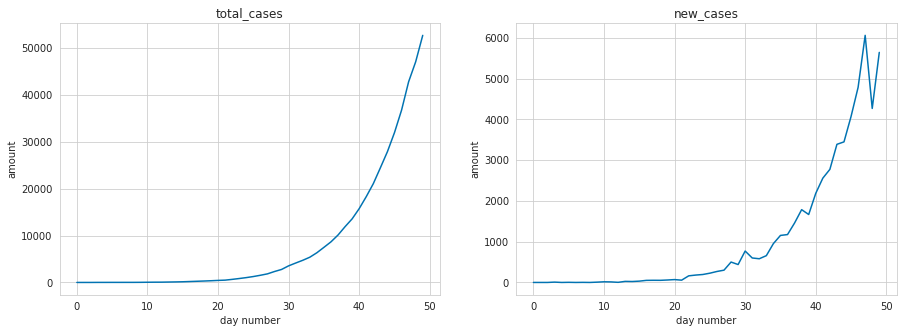

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(X_train, y1_train)
plt.xlabel("day number")
plt.ylabel("amount")
plt.title("total_cases")

plt.subplot(122)
plt.plot(X_train, y2_train)
plt.xlabel("day number")
plt.ylabel("amount")
plt.title("new_cases")

plt.show()

In [10]:
lr = Ridge(alpha=1)
X = X_train.reshape(-1, 1)
y = np.log(y1_train)
lr.fit(X, y)
y1_train_pred = np.exp(np.linspace(0, 50, 50) * lr.coef_ + lr.intercept_)
print(f"for total_cases: y = exp({lr.coef_[0]:.2f}x + {lr.intercept_:.2f})")

for total_cases: y = exp(0.20x + 1.82)


In [11]:
lr = Ridge(alpha=1)
y = np.log(y2_train)
lr.fit(X, y)
y2_train_pred = np.exp(np.linspace(0, 50, 50) * lr.coef_ + lr.intercept_)
print(f"for new_cases: y = exp({lr.coef_[0]:.2f}x + {lr.intercept_:.2f})")

for new_cases: y = exp(0.19x + 0.32)


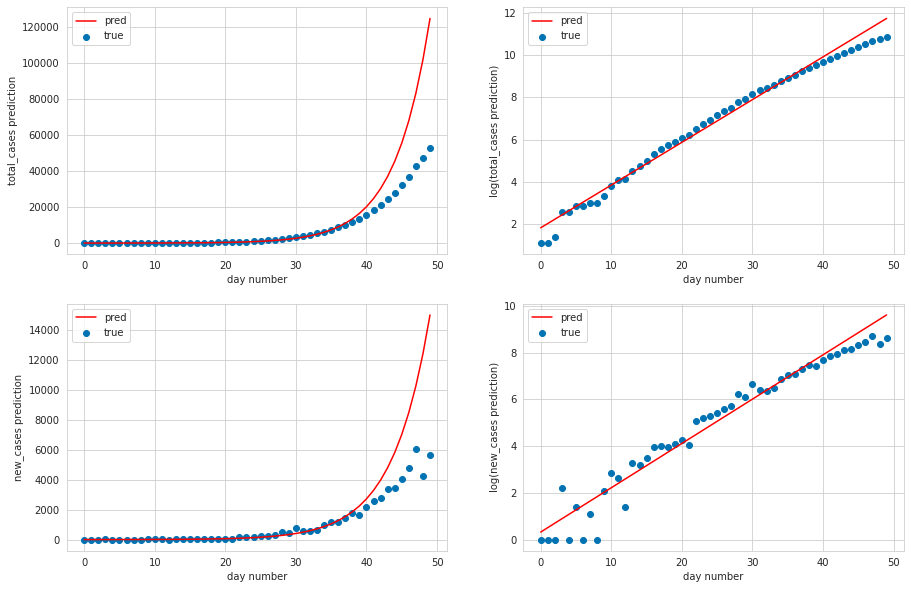

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.scatter(X_train, y1_train, label="true")
plt.plot(X_train, y1_train_pred, 'r', label="pred");
plt.xlabel("day number")
plt.ylabel("total_cases prediction")
plt.legend()

plt.subplot(222)
plt.scatter(X_train, np.log(y1_train), label="true")
plt.plot(X_train, np.log(y1_train_pred), 'r', label="pred")
plt.xlabel("day number")
plt.ylabel("log(total_cases prediction)")
plt.legend()

plt.subplot(223)
plt.scatter(X_train, y2_train, label="true")
plt.plot(X_train, y2_train_pred, 'r', label="pred");
plt.xlabel("day number")
plt.ylabel("new_cases prediction")
plt.legend()

plt.subplot(224)
plt.scatter(X_train, np.log(y2_train), label="true")
plt.plot(X_train, np.log(y2_train_pred), 'r', label="pred")
plt.xlabel("day number")
plt.ylabel("log(new_cases prediction)")
plt.legend()

plt.show()

> - Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого **значение дисперсии шума** в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

Чтобы осознать задание, помедитируем над формулами ниже

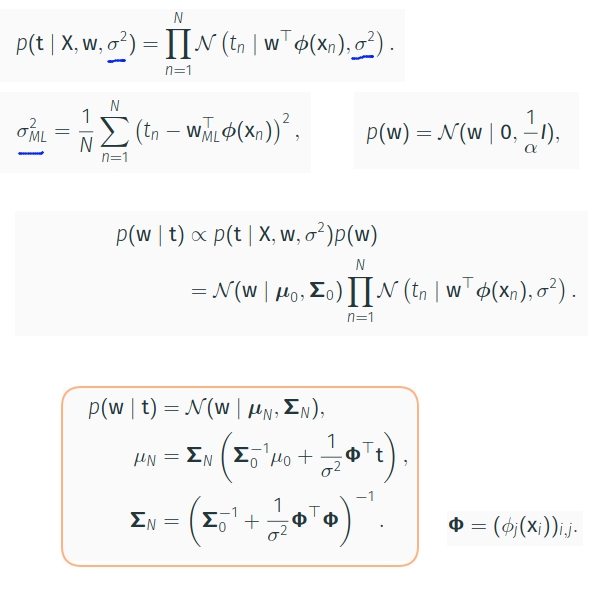

#### Выберем сначала достаточно широкое априорное распределение:
Обработаем `total_cases`

c `new_cases` не будем больше работать в этом задании, чтобы не дублировать 

Мы уже построили 1 модель, которая дала нам уравнение `y = exp(0.20x + 1.82)`

Также знаем, что _slope_ надо брать больше 0, а _intercept_ может быть каким угодно

Распределим наклон в {0..1}, а интерсепт вокруг нуля с большой дисперсией до 4

$ P(w) = \mathcal{N}(w|\mu, \sigma^2) $


#### Посчитаем дисперсию шума данных и объявим априорные сигму и мю:

In [13]:
sigma_ml = np.sqrt(np.sum((np.log(y1_train) - np.log(y1_train_pred)) ** 2) / np.log(y1_train).shape[0])
print(f"likelihood sigma = {sigma_ml}")

cur_mu, cur_sigma = np.array([0, .5]), np.array([[2, 0], 
                                                 [0, .15]])

likelihood sigma = 0.3674725442581981


Далее покопируем код из 3 лекции и слегка поменяем его

In [14]:
true_mu = [1.82, .2]  # не истинное, но предсказанное по канонам MAP
def true_curve(x):
    return true_mu[0] + true_mu[1]*x


## X-координаты точек данных
xd = X_train
num_points = len(xd)

## Данные
data = np.log(y1_train)

In [15]:
N = 500
xs = np.linspace(-3, 3, N)
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z, xmin=-1, xmax=1, ymin=-1, ymax=1):
    # Make the plot
    plt.axis('equal')
    plt.xlim((xmin, xmax))
    plt.ylim((ymin, ymax))
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter(true_mu[0], true_mu[1], marker='*', s=120)    

(500, 500)


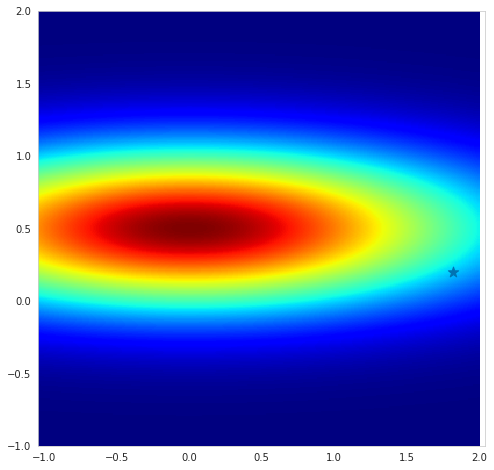

In [16]:
# нарисуем априорное распределение параметров и посмотрим,
# где там лежат предсказанные стантартным образом значения
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

fig = plt.figure(figsize=(8, 8))
myplot_heatmap(Z, -1, 2, -1, 2)

In [17]:
def myplot_sample_lines_exp(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем экспоненты
    my_w = np.random.multivariate_normal(mu, sigma, n)
    xs = np.linspace(0, 10, 50)
    if not points is None:
        xs = np.linspace(min(points[0]), max(points[0]))
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs), 'k-', lw=.4)

    if not points is None:
        plt.ylim((min(points[1]), max(points[1])))
        plt.xlim((min(points[0]), max(points[0])))
        plt.scatter(points[0], points[1], marker='*', s=200)

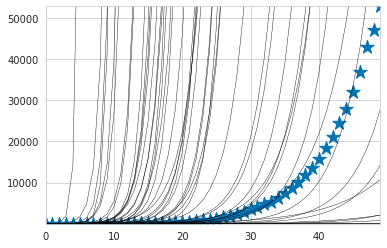

In [18]:
# Достаточно шикорое по всей видимости
myplot_sample_lines_exp(cur_mu, cur_sigma, 50, points=[xd, y1_train])

In [19]:
def complete_bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    """Можно по 1 точке скармливать, но удобней сразу все данные показать
    
    parameters:
    
    mu, sigma: float, parameters of a prior normal distrubution \t
    x, y: matrix and vector of data (x must be without pseudo-1-column for w0) \t
    sigma_noise: float, noise in data, can be found from comparison of MAP-model and real y-values
    """
    x_matrix = np.c_[np.ones_like(x), x]
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(x_matrix.T, 
                                                                                       x_matrix) )
    mu_n = np.matmul(
        sigma_n, 
        np.matmul(np.linalg.inv(sigma), 
                  np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(x_matrix.T, y))
    return mu_n, sigma_n

In [20]:
# обучимся используя значение дисперсии шума в данных, 
# полученной из максимальной апостериорной модели (~.37)
cur_mu, cur_sigma = complete_bayesian_update(
    cur_mu, 
    cur_sigma, 
    xd, 
    data, 
    sigma_noise=sigma_ml,
)
cur_mu, cur_sigma

(array([1.81060649, 0.19860461]),
 array([[ 1.04298052e-02, -3.16047665e-04],
        [-3.16047665e-04,  1.29173242e-05]]))

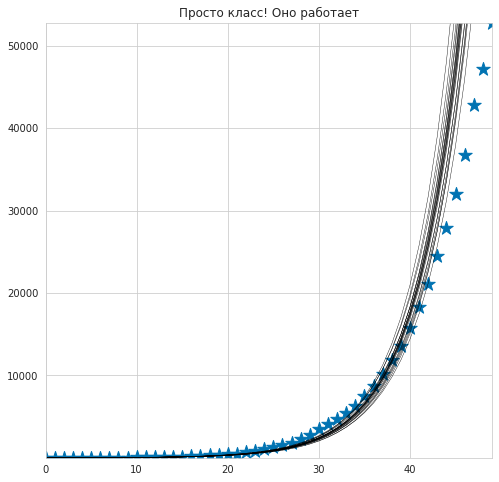

In [21]:
fig = plt.figure(figsize=(8, 8))
plt.title('Просто класс! Оно работает')
myplot_sample_lines_exp(cur_mu, cur_sigma, 20, points=[xd, y1_train])

In [22]:
def sample_statistics_for_exp(mu, sigma, xs, n=20):
    """Посэмплируем прямые и выдадим статистики по предсказаниям"""
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i, w in enumerate(my_w):
        res[i, :] = np.exp(w[0] + w[1]*xs)
    return res


def plot_predictions_for_exp(xs, mu, x, points):
    """Нарисуем результат"""
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(xs, np.exp(true_curve(xs)), label="Эскалерновский ответ")
    ax.plot(xs, np.exp(mu[1] * xs + mu[0]), "--r", label="MAP гипотеза")
    ax.fill_between(
        xs,
        np.exp(mu[1] * xs + mu[0] - sigma_ml),
        np.exp(mu[1] * xs + mu[0] + sigma_ml),
        color=palette[1], 
        alpha=.3, 
        label="+- дисперсия шума",
    )
    ax.fill_between(
        xs, 
        np.mean(x, axis=0) - np.std(x, axis=0),
        np.mean(x, axis=0) + np.std(x, axis=0), 
        color=palette[-3],
        alpha=.4, 
        label="+- дисперсия предсказаний"
    )
    ax.scatter(points[0], points[1], marker='*', c='k', s=100, label='data')
    ax.legend(fontsize=legend_fontsize, loc="upper left")

> - Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к **1 мая 2020 года? к 1 июня? к 1 сентября?** Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

Построим сначала все на красимом графике

In [23]:
from datetime import datetime

start_date = datetime.strptime("2020-03-03", '%Y-%m-%d')
date_of_interest1 = datetime.strptime("2020-05-01", '%Y-%m-%d')
date_of_interest2 = datetime.strptime("2020-06-01", '%Y-%m-%d')
date_of_interest3 = datetime.strptime("2020-09-01", '%Y-%m-%d')

may_daynum = (date_of_interest1 - start_date).days
june_daynum = (date_of_interest2 - start_date).days
sep_daynum = (date_of_interest3 - start_date).days

print("Порядковые номера интересующих дней с 3 марта:", 
      may_daynum, june_daynum, sep_daynum)

Порядковые номера интересующих дней с 3 марта: 59 90 182


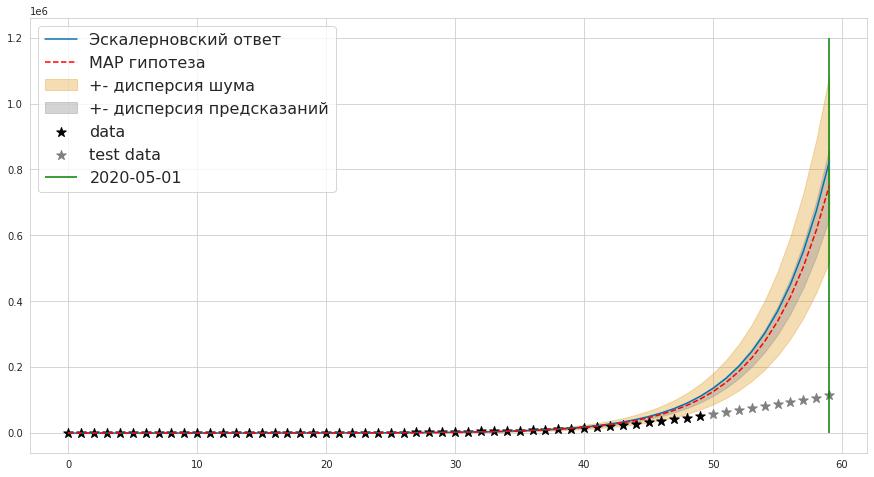

In [24]:
# Нарисуем вплоть до мая, т.к. далее огроменный рост и ничего не видно полезного
xs = np.linspace(0, sep_daynum, sep_daynum + 1)
x = sample_statistics_for_exp(cur_mu, cur_sigma, xs, n=1000)
plot_predictions_for_exp(xs[:may_daynum + 1], cur_mu, x[:, :may_daynum + 1], [xd, y1_train])

# plot test data
plt.scatter(X_test[:may_daynum - 49], y1_test[:may_daynum - 49], 
            marker='*', c='gray', s=100, label='test data')
plt.vlines(may_daynum, 0, 1.2e6, 'green', label='2020-05-01')
plt.legend(fontsize=legend_fontsize, loc="upper left")
plt.show()

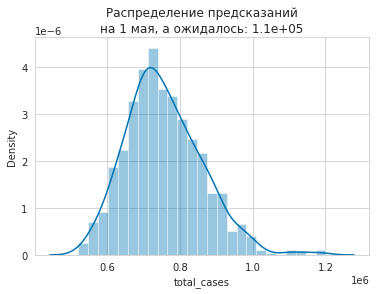

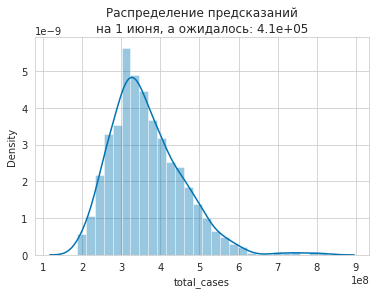

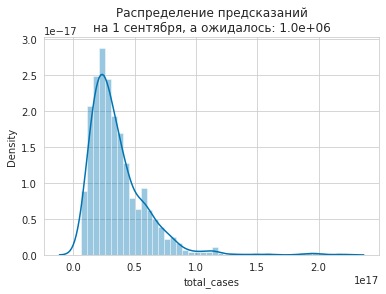

In [25]:
for i, daynum in enumerate([may_daynum, june_daynum, sep_daynum]):
    day_preds = x[:, daynum]
    days = ["1 мая", "1 июня", "1 сентября"]
    sns.distplot(day_preds)
    plt.title(f"Распределение предсказаний\nна {days[i]}, a ожидалось: {y1_test[daynum - 50]:.1e}")
    plt.xlabel("total_cases")
    plt.show()

Диагноз ясен. В мае ошибка всего лишь на  $\approx$700 тыс. человек. К июню количество болеющих/переболевших в России станет больше, чем население России, а к сентябрю перевалит за общее число людей за все времена

### 3.
Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:
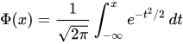

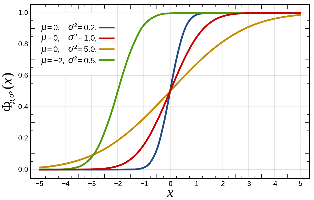

`Работа (Murray, 2020) утверждает, что это лучший сигмоид для пандемии коронавируса, но к этой статье тоже есть вопросы, да и данных с тех пор стало больше. Честно говоря, я выбрал функцию распределения для гауссиана просто потому, что с ней будет легче всего работать.`

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.
- Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.
- Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.
- Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

#### Способ обучения:
y - `total_cases` 

dy - `new_cases`


$ y = \Phi(x) = const_1 * \int_{-\infty}^x e^{-t^2/2} dt $

$ t = k_0x + b_0  $

$ dy = d\Phi(x) = e^{const_2-t^2/2} = e^{w_2x^2 + w_1x + w_0} $

#### В итоге обучаем регрессию на квадратичной форме  в поисках `new_cases`

$ ln(dy) = w_2x^2 + w_1x + w_0 $


----------

In [26]:
lr = Ridge()
X = np.c_[X_train, X_train ** 2]
y = np.log(y2_train)
lr.fit(X, y)
new_cases_train_pred = np.exp(lr.predict(X))
print(f"dy = exp({lr.coef_[1]:.4f}x^2 + {lr.coef_[0]:.3f}x + {lr.intercept_:.3f})")

dy = exp(-0.0018x^2 + 0.275x + -0.393)


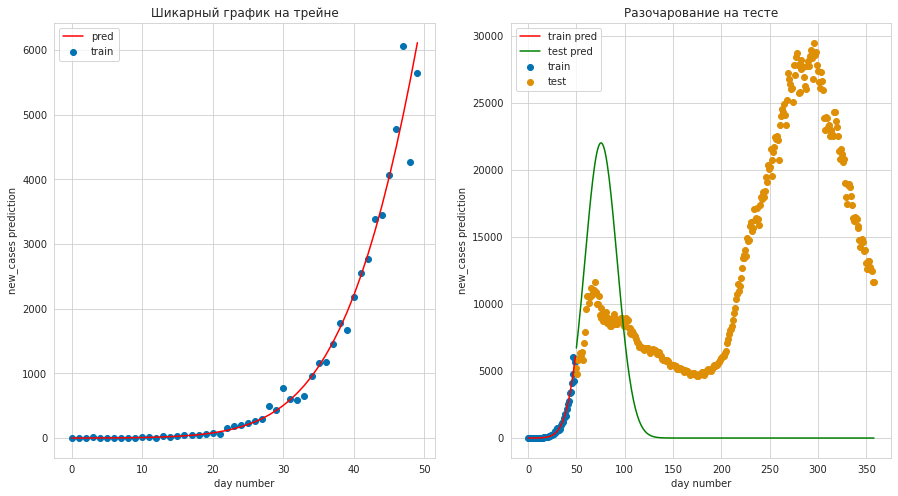

In [27]:
plt.figure(figsize=figsize)
plt.subplot(121)
plt.scatter(X_train, y2_train, label="train")
plt.plot(X_train, new_cases_train_pred, 'r', label="pred");
plt.title("Шикарный график на трейне")
plt.xlabel("day number")
plt.ylabel("new_cases prediction")
plt.legend()

plt.subplot(122)
plt.scatter(X_train, y2_train, label="train")
plt.scatter(X_test, y2_test, label="test")
plt.plot(X_train, new_cases_train_pred, 'r', label="train pred")

X = np.c_[X_test, X_test ** 2]
new_cases_test_pred = np.exp(lr.predict(X))
plt.plot(X_test, new_cases_test_pred, 'g', label="test pred")

plt.title("Разочарование на тесте")
plt.xlabel("day number")
plt.ylabel("new_cases prediction")
plt.legend()

plt.show()

In [28]:
def cum_sum(new_cases, last_total_sum):
    total_cases = np.zeros_like(new_cases)
    total_cases[0] += last_total_sum + new_cases[0]
    for i in range(1, len(new_cases)):
        total_cases[i] += total_cases[i - 1] + new_cases[i]
    return total_cases

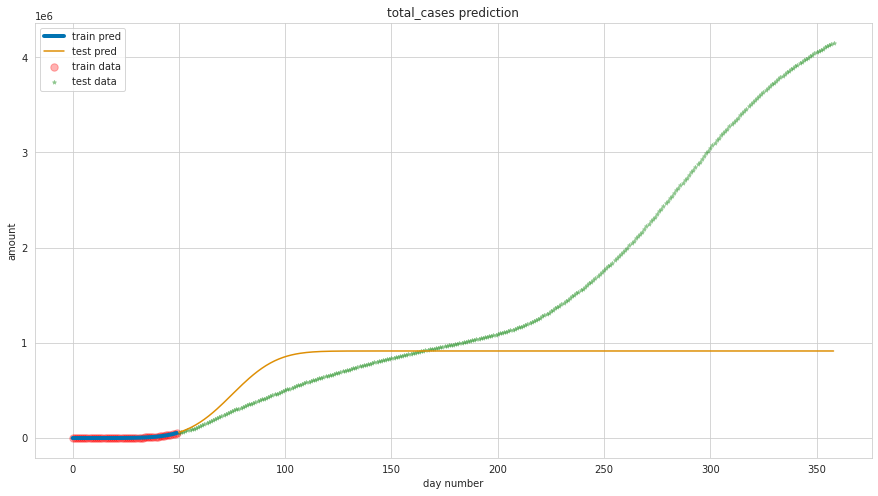

In [29]:
plt.figure(figsize=figsize)
plt.plot(X_train, cum_sum(new_cases_train_pred, 0), linewidth=4, label="train pred")
plt.scatter(X_train, y1_train, c='r', s=55, alpha=.3, label="train data")

plt.scatter(X_test, y1_test, c='g', marker="*", s=15, alpha=.3, label="test data")
plt.plot(X_test, cum_sum(new_cases_test_pred, cum_sum(new_cases_train_pred, 0)[-1]), label="test pred")
plt.title("total_cases prediction")
plt.xlabel("day number")
plt.ylabel("amount")
plt.legend()
plt.show()

#### Видим, что предсказания адекватны до 60-70 дня, а далее все плохо

#### Посчитаем дисперсию шума данных и объявим априорные сигму и мю:

Каким должно быть априорное распределение непонятно, возьмем просто большое вокруг нуля

In [30]:
sigma_ml = np.sqrt(np.sum((np.log(y2_train) - np.log(new_cases_train_pred)) ** 2) /
                   np.log(new_cases_train_pred).shape[0])
print(f"likelihood sigma = {sigma_ml}")

cur_mu, cur_sigma = np.array([0, 0, 0]), 3 * np.array([[1, 0, 0],
                                                       [0, 1, 0],
                                                       [0, 0, .1]])

likelihood sigma = 0.4891718374380322


In [31]:
# dy = exp(-0.0018x^2 + 0.275x + -0.393)
true_mu = [-.393, .275, -.0018]  # не истинное, но предсказанное по канонам MAP
def true_curve(x):
    return true_mu[0] + true_mu[1]*x + true_mu[2] * x**2


## X-координаты точек данных
xd = X_train
num_points = len(xd)

## Данные
data = np.log(y2_train)

In [32]:
def myplot_sample_lines_sigmoid(mu, sigma, n=20, points=None):
    # Посэмплируем и порисуем экспоненты
    my_w = np.random.multivariate_normal(mu, sigma, n)
    xs = np.linspace(0, 10, 50)
    if not points is None:
        xs = np.linspace(min(points[0]), max(points[0]))
    for w in my_w:
        plt.plot(xs, np.exp(w[0] + w[1]*xs + w[2]*xs**2), 'k-', lw=.4)

    if not points is None:
        plt.ylim((min(points[1]), max(points[1])))
        plt.xlim((min(points[0]), max(points[0])))
        plt.scatter(points[0], points[1], marker='*', s=200)

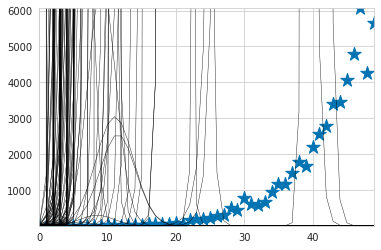

In [33]:
# Настолько широкое, что мы не видим нормальных линий
myplot_sample_lines_sigmoid(cur_mu, cur_sigma, 180, points=[xd, y2_train])

In [34]:
def complete_bayesian_update_for_sigmoid(mu, sigma, x, y, sigma_noise=.25):
    """Можно по 1 точке скармливать, но удобней сразу все данные показать
    
    parameters:
    
    mu, sigma: float, parameters of a prior normal distrubution \t
    x, y: matrix and vector of data (x must be without pseudo-1-column for w0) \t
    sigma_noise: float, noise in data, can be found from comparison of MAP-model and real y-values
    """
    x_matrix = np.c_[np.ones_like(x), x, x ** 2]
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(x_matrix.T, 
                                                                                       x_matrix) )
    mu_n = np.matmul(
        sigma_n, 
        np.matmul(np.linalg.inv(sigma), 
                  np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(x_matrix.T, y))
    return mu_n, sigma_n

In [35]:
# обучимся используя значение дисперсии шума в данных, 
# полученной из максимальной апостериорной модели (~.37)
cur_mu, cur_sigma = complete_bayesian_update_for_sigmoid(
    cur_mu, 
    cur_sigma, 
    xd, 
    data, 
    sigma_noise=sigma_ml,
)
cur_mu, cur_sigma

(array([-0.39110616,  0.27517103, -0.00182211]),
 array([[ 3.92775908e-02, -3.17330643e-03,  5.34218188e-05],
        [-3.17330643e-03,  3.51131775e-04, -6.70916487e-06],
        [ 5.34218188e-05, -6.70916487e-06,  1.37127395e-07]]))

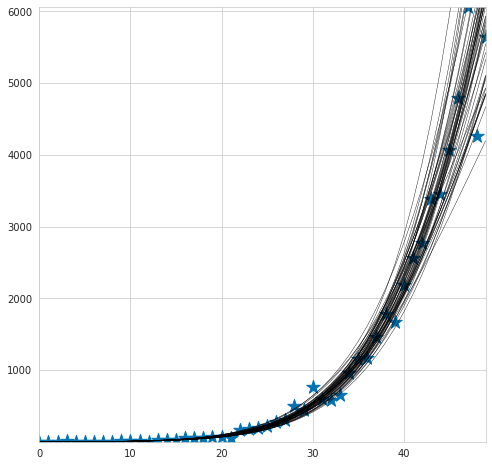

In [36]:
fig = plt.figure(figsize=(8, 8))
myplot_sample_lines_sigmoid(cur_mu, cur_sigma, 50, points=[xd, y2_train])

In [37]:
def sample_statistics_for_sigmoid(mu, sigma, xs, n=20):
    """Посэмплируем прямые и выдадим статистики по предсказаниям"""
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res = np.zeros((n, xs.shape[0]))
    for i, w in enumerate(my_w):
        res[i, :] = np.exp(w[0] + w[1]*xs + w[2]*xs**2)
    return res


def plot_predictions_for_sigmoid(xs, mu, x, points):
    """Нарисуем результат"""
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.plot(xs, np.exp(true_curve(xs)), label="Эскалерновский ответ")
    ax.plot(xs, np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0]), "--r", label="MAP гипотеза")
    ax.fill_between(
        xs,
        np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0] - sigma_ml),
        np.exp(mu[2] * xs**2 + mu[1] * xs + mu[0] + sigma_ml),
        color=palette[1],
        alpha=.3,
        label="+- дисперсия шума",
    )
    ax.fill_between(
        xs,
        np.mean(x, axis=0) - np.std(x, axis=0),
        np.mean(x, axis=0) + np.std(x, axis=0),
        color=palette[-3],
        alpha=.4,
        label="+- дисперсия предсказаний"
    )
    ax.scatter(points[0], points[1], marker='*', c='k', s=100, label='data')
    ax.legend(fontsize=legend_fontsize, loc="upper left")

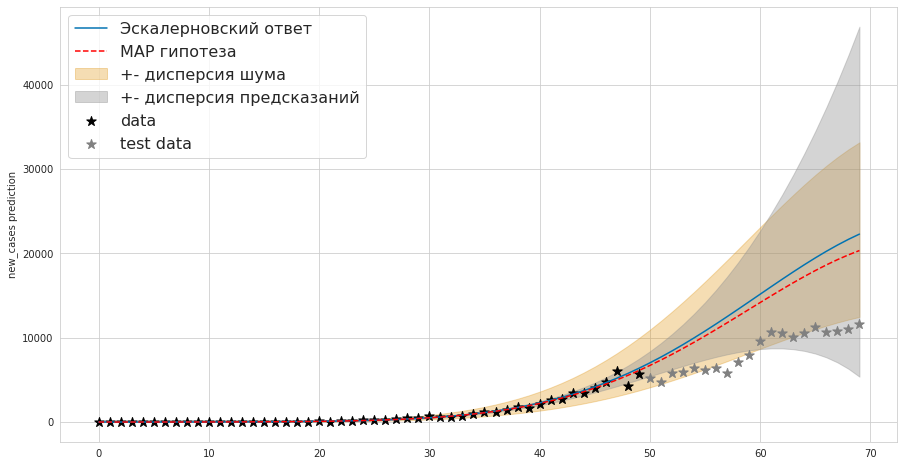

In [38]:
# Нарисуем вплоть до мая, т.к. далее огроменный рост и ничего не видно полезного
xs = np.linspace(0, sep_daynum, sep_daynum + 1)
x = sample_statistics_for_sigmoid(cur_mu, cur_sigma, xs, n=5000)
plot_predictions_for_sigmoid(xs[:may_daynum + 1 + 10], cur_mu, x[:, :may_daynum + 1 + 10], [xd, y2_train])

# plot test data
plt.scatter(X_test[:may_daynum - 49 + 10], y2_test[:may_daynum - 49 + 10], 
            marker='*', c='gray', s=100, label='test data')
plt.legend(fontsize=legend_fontsize, loc="upper left")
plt.ylabel("new_cases prediction")
plt.show()

> - Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

In [39]:
# Посчитаем кумулятивную сумму по `new_cases`
total_cases_pred_distr = cum_sum(x.T, 0).T

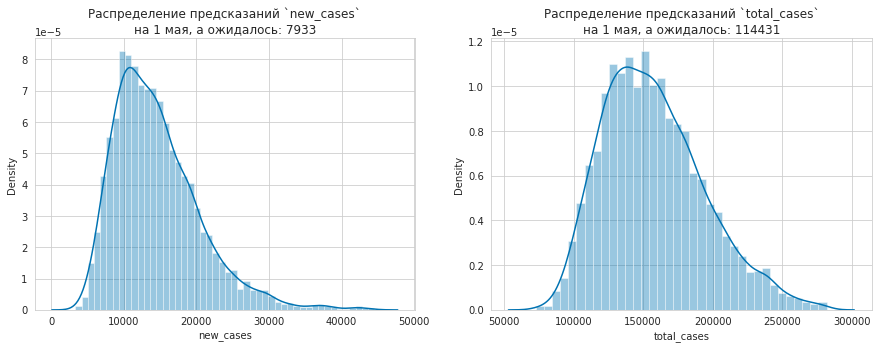

Общее количество заболевших 1 мая будет равно в лучшем случае 114187, а в худшем 210147
Но на самом деле оно было равно 114431



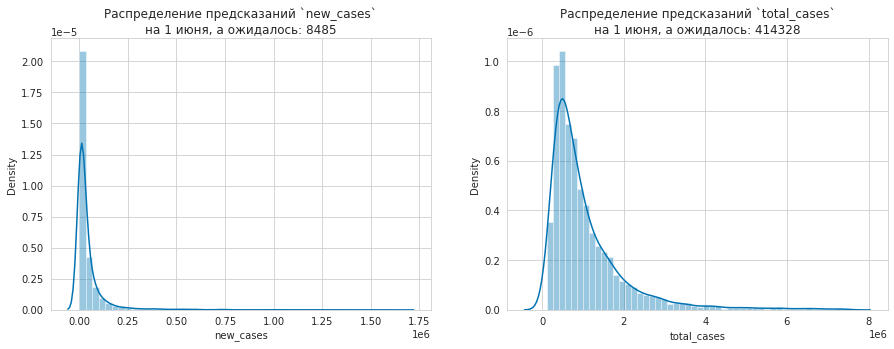

Общее количество заболевших 1 июня будет равно в лучшем случае 314599, а в худшем 2276690
Но на самом деле оно было равно 414328



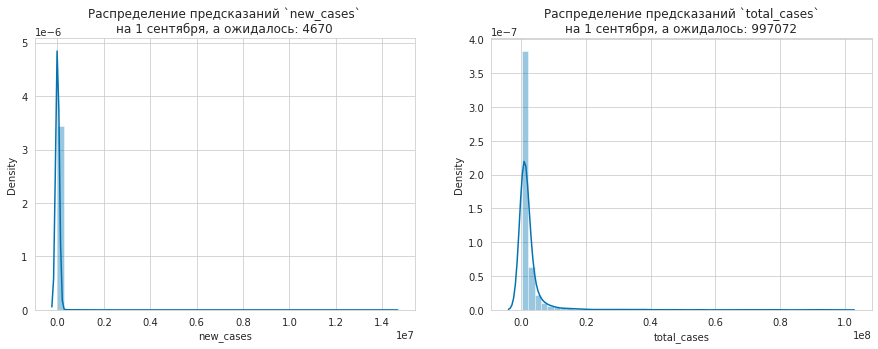

Общее количество заболевших 1 сентября будет равно в лучшем случае 329650, а в худшем 5074236
Но на самом деле оно было равно 997072



In [40]:
for i, daynum in enumerate([may_daynum, june_daynum, sep_daynum]):
    day_preds = x[:, daynum]
    days = ["1 мая", "1 июня", "1 сентября"]
    
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    sns.distplot(np.sort(day_preds)[:-10])
    plt.title(f"Распределение предсказаний `new_cases`\nна {days[i]}, a ожидалось: {y2_test[daynum - 50]:.0f}")
    plt.xlabel("new_cases")
    
    plt.subplot(122)
    sns.distplot(np.sort(total_cases_pred_distr[:, daynum])[:-50])
    plt.title(f"Распределение предсказаний `total_cases`\nна {days[i]}, a ожидалось: {y1_test[daynum - 50]:.0f}")
    plt.xlabel("total_cases")
    
    plt.show()
    
    opt_pred, pes_pred = np.percentile(
        total_cases_pred_distr[:, daynum], 
        [10, 90]
    )
    print(
        f"Общее количество заболевших {days[i]} будет равно в лучшем случае {opt_pred:.0f}, а в худшем {pes_pred:.0f}"
    )
    print(
        f"Но на самом деле оно было равно {y1_test[daynum - 50]:.0f}\n"
    )

Видно, что в мае и июне удовлетворительное предсказание. Сентябрь уже не очень, дисперсия велика, на других графиках выше это очевидно. Хотя у июня дисперсия тоже велика, но будем считать что среднее там неплохое

### 4.
Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

#### Ответ: -


----------

### 5.
[Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете]
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

#### Ответ:
Экстраполяция - дело неблагодарное. Моделирование чуть-чуть сложной функции по одному параметру не самое эффективное решение. Мы можем сказать что-то адекватное только для 20 будущих дней максимум, и решение по таким результатам может быть только короткосрочным. Нужно улучшить модель, дать ей других данных. Например, недавно была вспышка чумы свиней, эбола-чан тоже была, грипп есть всегда. Возможно, вспышки и эпидемию сравнивать некорректно, но долю истины о будущем вычленить можно, как было с предсказанием второй волны в связи с очевидными факторами.

А вообще, я за естественный иммунитет. Занимаясь медициной, мы продолжаем взращивать генетически ущербных особей (уязвимый иммунитет это одно из многих зол, которые усиливают свое влияние в связи с генетической деградацией), что негативно сказывается на развитии популяции.

----------